In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import sweetviz as sv

import tensorflow as tf
import tensorflow_decision_forests as tfdf

In [2]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
report =sv.analyze(train_df)
report.show_html("report.html")

                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [4]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train_df.drop(['Cabin','Name','Ticket'],axis=1,inplace=True)

In [6]:
train_df["Age"].fillna(train_df["Age"].mean(),inplace=True)
train_df["Embarked"].fillna(train_df["Embarked"].mode()[0],inplace=True)

In [7]:
print(train_df.isnull().sum())
train_df.head()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

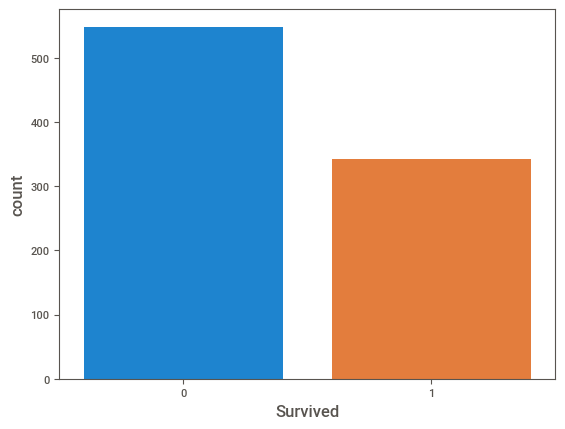

In [10]:
sns.countplot(x="Survived",data=train_df)

In [11]:
train_df.value_counts("Sex")

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

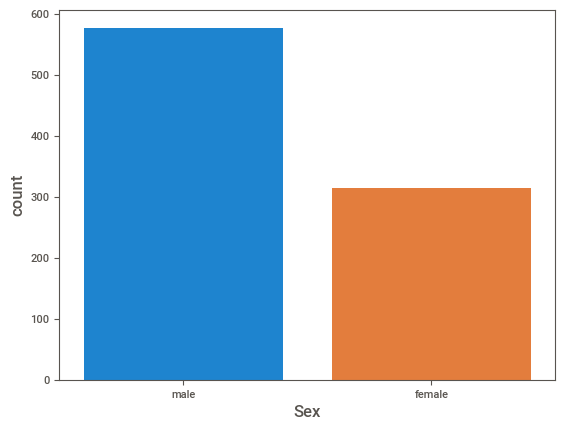

In [12]:
sns.countplot(x="Sex",data=train_df)

<Axes: xlabel='Sex', ylabel='count'>

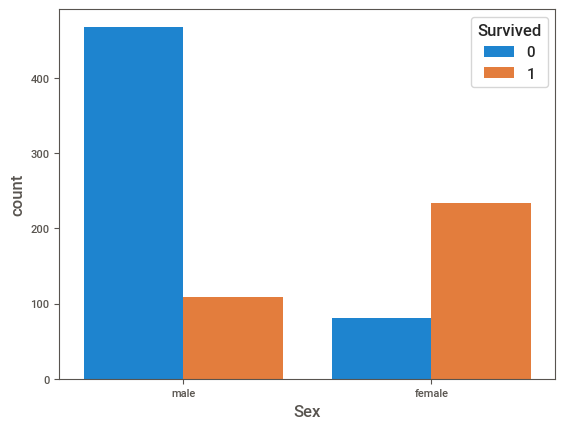

In [13]:
sns.countplot(x="Sex",hue="Survived",data=train_df)

In [14]:
train_df.value_counts("Pclass")

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

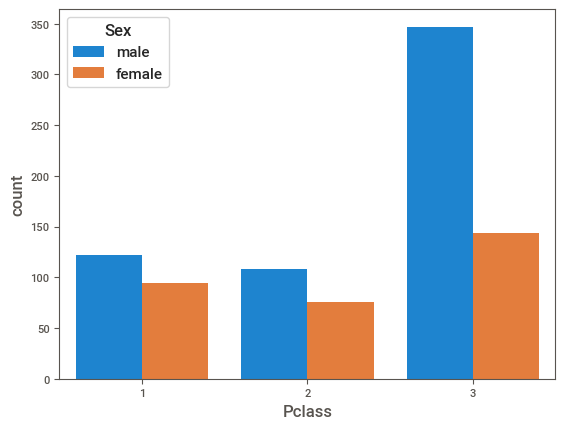

In [15]:
sns.countplot(x="Pclass",hue="Sex",data=train_df)

<Axes: xlabel='Pclass', ylabel='count'>

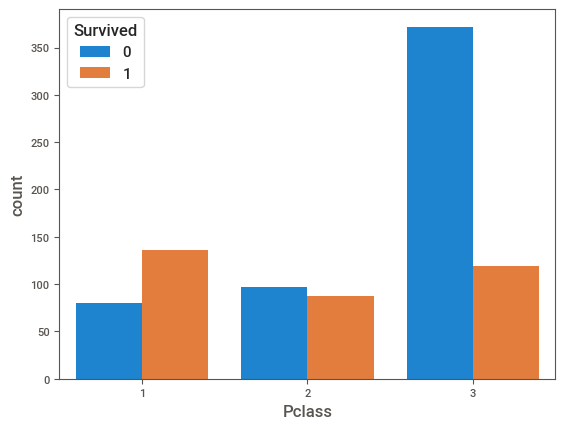

In [16]:
sns.countplot(x="Pclass",hue="Survived",data=train_df)

In [17]:
train_df.replace({"Sex":{"male":0,"female":1},"Embarked":{"S":0,"C":1,"Q":2}},inplace=True)

In [18]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


<Axes: >

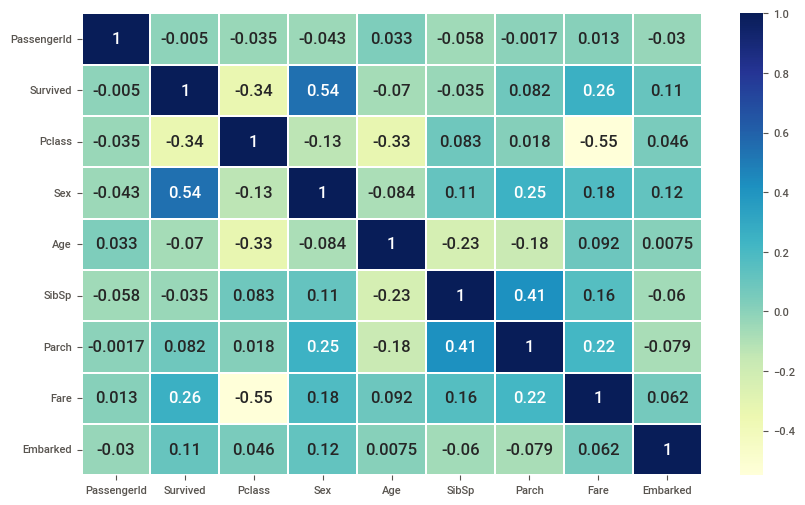

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.corr(),annot=True,cmap='YlGnBu',linewidths=0.2)

In [20]:
x=train_df.drop("Survived",axis=1)
y=train_df["Survived"]

In [24]:
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,0,22.000000,1,0,7.2500,0
1,2,1,1,38.000000,1,0,71.2833,1
2,3,3,1,26.000000,0,0,7.9250,0
3,4,1,1,35.000000,1,0,53.1000,0
4,5,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,887,2,0,27.000000,0,0,13.0000,0
887,888,1,1,19.000000,0,0,30.0000,0
888,889,3,1,29.699118,1,2,23.4500,0
889,890,1,0,26.000000,0,0,30.0000,1
